### Shearing of Image

In [1]:
import cv2
import numpy as np

In [2]:
shear_x = 0.50
shear_y = -0.5

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

img = cv2.imread('lenna.png')
rows,cols,_ = img.shape

sheared_img = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))

cv2.imshow('img',sheared_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
shear_x = 0.40
shear_y = -0.25

M = np.array([[1,shear_x,0],
              [shear_y,1,0],
              [0,0,1]])

img = cv2.imread('lenna.png')
rows,cols,_ = img.shape

T = np.float32([[1, 0, 0], [0, 1, 150]])

img_translation = cv2.warpAffine(img, T, (int(cols*1.5),int(rows*1.5)))
img_sheared1 = cv2.warpPerspective(img_translation,M,(int(cols*1.5),int(rows*1.5)))

cv2.imshow('Sheared Img', img_sheared1)
cv2.waitKey(0)
cv2.destroyAllWindows()

###  Shearing using skimage

In [4]:
from skimage import transform
from skimage import io
import matplotlib.pyplot as plt

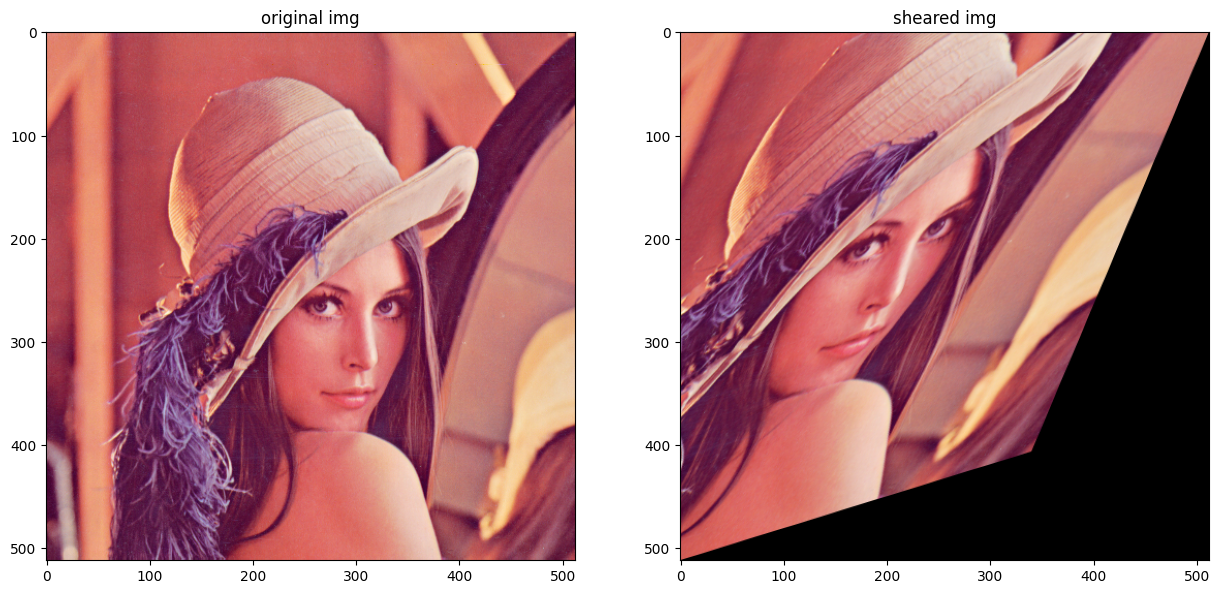

In [5]:
img = io.imread('lenna.png')

shear_x = -0.4
shear_y = -0.3

tform = transform.AffineTransform(shear=(shear_x,shear_y))

img_sheared = transform.warp(img,tform)

plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img),plt.title('original img')
plt.subplot(122),plt.imshow(img_sheared),plt.title('sheared img')
plt.show()

###  Affine Transformation using cv2

In [6]:
img = cv2.imread('lenna.png')

tx = 50       # Translation along x axis
ty = 100      # translation along y axis
angle = 45    # rotation angle
scale = 1.2   # scaling factor
shear_x = 0.3  # shearing along x axis
shear_y= 0.2   # shearing along y axis

# create trasformation matrix
M = np.float32([[scale*np.cos(np.radians(angle)),shear_x,tx],
               [shear_y,scale*np.sin(np.radians(angle)),ty]])

# apply transformation using warpAffine
img_affine = cv2.warpAffine(img,M,(512,512))

new_image = np.hstack([img,img_affine])

cv2.imshow('Affine transformed Image',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Affine Transformation using skimage

In [7]:
from skimage import transform
from skimage import io

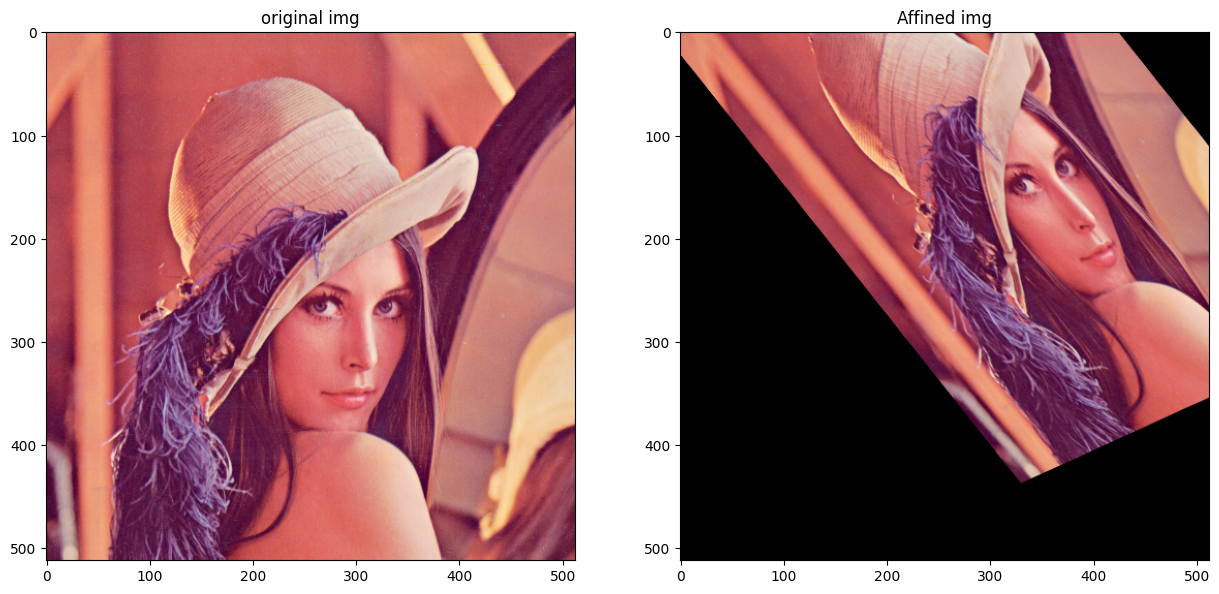

In [8]:
img = io.imread('lenna.png')

tx = 20       # Translation along x axis
ty = 10      # translation along y axis
angle = 30    # rotation angle
scale = 1.2   # scaling factor
shear_x = 0.3  # shearing along x axis
shear_y= 0.2   # shearing along y axis

tform = transform.AffineTransform(scale = (scale,scale),
                                 rotation = np.radians(angle),
                                 translation=(tx,ty),
                                 shear=(shear_x,shear_y))

img_affine = transform.warp(img,tform)

plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img),plt.title('original img')
plt.subplot(122),plt.imshow(img_affine),plt.title('Affined img')
plt.show()

In [9]:
import tkinter
from PIL import ImageTk , Image
import os

In [10]:
# creating main window
root = tkinter.Tk()

# load the image
img = ImageTk.PhotoImage(Image.open('lenna.png'))

# reading image
panel = tkinter.Label(root,image = img)

# setting the Application
panel.pack(side = 'bottom',fill='both',expand='yes')

# running the application
root.mainloop()

* ''projective transformation aka homographies are powerfull tool in CV used to manipulate images beyond limitations of affine transformation''
     
\     
* ''while affine transformation preserv parallelism of lines and ratios of ditance , projective transformations allow lines to converge and ratios to change , enabling modeling of perspective effects and more complex object deformations.''

In [22]:
img = cv2.imread('lenna.png')

source_point = np.array([[100,50],[200,50],[200,150],[100,150]],dtype = np.float32)

destination_point = np.array([[100,50],[250,50],[250,250],[50,250]],dtype = np.float32)

M = cv2.findHomography(source_point,destination_point)

img_transformed = cv2.warpPerspective(img,M,(1024,1024))

cv2.imshow('Original Image',img)
cv2.imshow('Projectively transformed Image',img_transformed)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'warpPerspective'
> Overload resolution failed:
>  - M is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'M'


In [12]:
from skimage import io

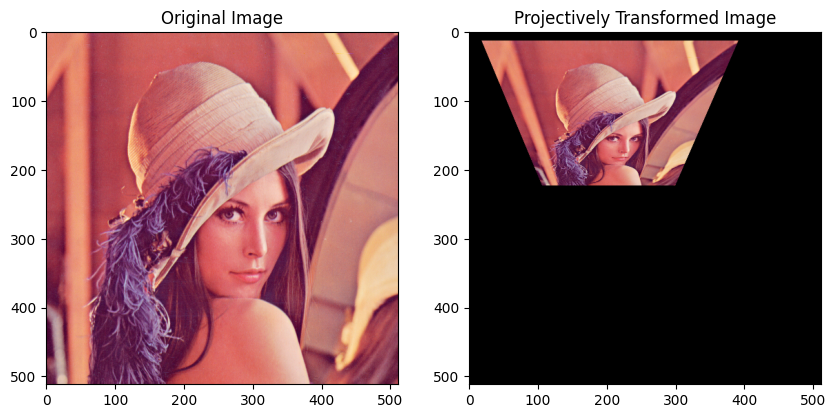

In [14]:
img = io.imread('lenna.png')

source_points = [[100,50], [200,50], [200,150], [100,150]]
destination_points = [[100,50], [250,50], [250,250], [50,250]]

tform = transform.ProjectiveTransform()

tform.estimate(source_points, destination_points)

img_transformed = transform.warp(img, tform)

plt.figure(figsize = (10,6))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(img_transformed)
plt.title('Projectively Transformed Image')
plt.show()

Basic Operations
--
Erosion = shrinks objects by removing pixels along the boundries<br>
Dilation = Expand object by adding pixels at the boundries<br>
Opening = Erosion followed by dilation , useful for noise reduction<br>
Closing = Dilation followed by erosion , often used to fill small holes and objects<br>

### Morphological Transformation

In [26]:
# Load image and convert to grayscale (if needed)
gray = cv2.imread('lenna.png', 0)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold to create binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Erosion - remove noise
eroded = cv2.erode(thresh, np.ones((3,3), np.uint8))

# Dilation - expand objects
dilated = cv2.dilate(thresh, np.ones((3,3), np.uint8))

# Opening - reduce noise while preserving object size
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# Closing - fill small holes
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3,3), np.uint8))

cv2.imshow('original Image',thresh)
cv2.imshow('Eroded Image',eroded)
cv2.imshow('Dilated Image',dilated)
cv2.imshow('Opening Image',opening)
cv2.imshow('Closing Image',closing)

cv2.waitKey(0)
cv2.destroyAllWindows()

Thresholding
--
It is a fundamental technique in CV used to segment an image into foreground and background objects<br>
It works by classifying each pixel in the image as either belonging to the object of interest or the background based on their intensity value